## The aim of this project is to scrape data from private property website and perform data analysis on it. I only want to scrape Randburg suburbs data.

In [242]:
# Import dependencies
import requests 
from bs4 import BeautifulSoup as bs 
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np

### Part 1 : Webscraping 

In [43]:
page = 0
prices = []
property_type = []
locations = []
bedrooms = []
bathrooms = []

###### Randburg properties take up about 55 web pages of the site, we will create a while loop to extract data from all pages. 

In [95]:
# A while loop to loop through all Randburg pages & extract data that we want

while page != 56:
    url = f"https://www.privateproperty.co.za/for-sale/gauteng/johannesburg/randburg-and-ferndale/35?page={page}"
    req = requests.get(url)
    soup = bs(req.content, "html.parser")
    for price in soup.findAll('div', class_="priceDescription"):
        prices.append(price.get_text(strip=True))
    for p_type in soup.findAll('div', class_="propertyType"):
        property_type.append(p_type.get_text(strip=True))
    for location in soup.findAll("div", class_="suburb"):
        locations.append(location.get_text(strip=True))
    for bd in soup.findAll('div', class_="icon bedroom"):
        bedrooms.append(bd.find_previous('div', class_="number").get_text(strip=True))
    for br in soup.findAll('div', class_="icon bedroom"):
        bathrooms.append(br.find_next_sibling('div', class_="number").get_text(strip=True))
    page = page + 1

In [96]:
# Convert lists into a Pandas Series
price_series = pd.Series(prices)
pt_series = pd.Series(property_type)
location_series = pd.Series(locations)
bd_series = pd.Series(bedrooms)
br_series = pd.Series(bathrooms)

In [97]:
# Create the DataFrame using multiple pandas series created above
data = pd.DataFrame(columns=['Bedrooms', 'Bathrooms', 'Property Type', 'Location', 'Price(R)'])
data['Bedrooms'] = bd_series
data['Bathrooms'] = br_series
data['Property Type'] = pt_series
data['Location'] = location_series
data['Price(R)'] = price_series
# Exporting the DataFrame as csv
data.to_csv('privateproperty.csv', index=False)

### Part 2 : Data Cleaning 

In [243]:
# View first 5 rows of the dataset
data = pd.read_csv('privateproperty.csv')
data.head()

,Bedrooms,Bathrooms,Property Type,Location,Price(R)
0,2.0,2.0,Apartment,Randpark Ridge,R 1 147 000
1,3.0,2.0,House,Ferndale,R 1 950 000
2,4.0,3.0,House,Robindale,R 2 199 999
3,5.0,3.0,House,Randpark Ridge,R 2 600 000
4,4.0,3.0,House,Blairgowrie,R 3 200 000


In [244]:
# View last 5 rows
data.tail()

,Bedrooms,Bathrooms,Property Type,Location,Price(R)
1287,2.0,2.0,Apartment,Windsor East,R 300 000
1288,2.0,2.0,Apartment,Ferndale,R 499 999
1289,4.0,2.0,Apartment,Ferndale,R 530 000
1290,1.0,1.0,Apartment,Ferndale,R 530 000
1291,4.0,3.0,Apartment,Ferndale,R 570 000


In [245]:
print("Number of rows : {}".format(data.shape[0]))
print("Number of columns : {}".format(data.shape[1]))

Number of rows : 1292
Number of columns : 5


In [246]:
# Display Information About Our Dataset Like Total Number Rows,
# Total Number of Columns, Datatypes of Each Column And Memory Requirement
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1292 entries, 0 to 1291
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Bedrooms       1292 non-null   float64
 1   Bathrooms      1292 non-null   float64
 2   Property Type  1292 non-null   object 
 3   Location       1292 non-null   object 
 4   Price(R)       1292 non-null   object 
dtypes: float64(2), object(3)
memory usage: 50.6+ KB


In [247]:
data.describe()

,Bedrooms,Bathrooms
count,1292.000000,1292.000000
mean,3.047988,2.108746
std,2.069012,1.638393
min,0.500000,1.000000
25%,2.000000,1.000000
50%,3.000000,2.000000
75%,4.000000,2.500000
max,32.000000,27.500000


In [248]:
# Check for Null Values in our dataset 
data.isna().sum()

Bedrooms         0
Bathrooms        0
Property Type    0
Location         0
Price(R)         0
dtype: int64

In [249]:
#Check for any duplicates and if there's any, we drop them
data.duplicated().sum()

124

In [250]:
# drop all duplicated rows
data.drop_duplicates(inplace=True)

In [251]:
data.shape

(1168, 5)

In [252]:
data['Price(R)'].dtype

dtype('O')

###### The price column is an object dtype and I'm going to convert it into an int data type. 

In [253]:
data['Price(R)'] = data['Price(R)'].str[2:]
data.head()

,Bedrooms,Bathrooms,Property Type,Location,Price(R)
0,2.0,2.0,Apartment,Randpark Ridge,1 147 000
1,3.0,2.0,House,Ferndale,1 950 000
2,4.0,3.0,House,Robindale,2 199 999
3,5.0,3.0,House,Randpark Ridge,2 600 000
4,4.0,3.0,House,Blairgowrie,3 200 000


In [254]:
data['Price(R)'].str.contains('ld', case=False).sum()

39

In [255]:
data = data.drop(data[data['Price(R)'].str.contains('ld', case=False)].index)

In [256]:
data.head()

,Bedrooms,Bathrooms,Property Type,Location,Price(R)
0,2.0,2.0,Apartment,Randpark Ridge,1 147 000
1,3.0,2.0,House,Ferndale,1 950 000
2,4.0,3.0,House,Robindale,2 199 999
3,5.0,3.0,House,Randpark Ridge,2 600 000
4,4.0,3.0,House,Blairgowrie,3 200 000


In [257]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1129 entries, 0 to 1291
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Bedrooms       1129 non-null   float64
 1   Bathrooms      1129 non-null   float64
 2   Property Type  1129 non-null   object 
 3   Location       1129 non-null   object 
 4   Price(R)       1129 non-null   object 
dtypes: float64(2), object(3)
memory usage: 52.9+ KB


In [258]:
data = data[data['Price(R)']!='ice on Application']

In [259]:
data = data.drop(data[data['Price(R)'].str.contains('ction', case=False)].index)

In [260]:
data.head()

,Bedrooms,Bathrooms,Property Type,Location,Price(R)
0,2.0,2.0,Apartment,Randpark Ridge,1 147 000
1,3.0,2.0,House,Ferndale,1 950 000
2,4.0,3.0,House,Robindale,2 199 999
3,5.0,3.0,House,Randpark Ridge,2 600 000
4,4.0,3.0,House,Blairgowrie,3 200 000


In [261]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1125 entries, 0 to 1291
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Bedrooms       1125 non-null   float64
 1   Bathrooms      1125 non-null   float64
 2   Property Type  1125 non-null   object 
 3   Location       1125 non-null   object 
 4   Price(R)       1125 non-null   object 
dtypes: float64(2), object(3)
memory usage: 52.7+ KB


In [262]:
# Convert price column into numeric dtypes
def clean_up(num):
    if num in data['Price(R)']:
        return num.replace(" ", "")
    else:
        return num.replace(" ", "")

In [263]:
data['Price(R)'] = data['Price(R)'].apply(clean_up)

In [264]:
data['Price(R)']

0       1147000
1       1950000
2       2199999
3       2600000
4       3200000
         ...   
1287     300000
1288     499999
1289     530000
1290     530000
1291     570000
Name: Price(R), Length: 1125, dtype: object

In [265]:
data['Price(R)'] = data['Price(R)'].astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1125 entries, 0 to 1291
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Bedrooms       1125 non-null   float64
 1   Bathrooms      1125 non-null   float64
 2   Property Type  1125 non-null   object 
 3   Location       1125 non-null   object 
 4   Price(R)       1125 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 92.7+ KB


### Part 3 : Analysis & Visualization

In [266]:
### All the suburbs in our dataset 
data['Location'].unique()

array(['Randpark Ridge', 'Ferndale', 'Robindale', 'Blairgowrie',
       'Fontainebleau', 'Windsor East', 'Kelland', 'Kensington B',
       'Robin Hills', 'Moret', 'Cresta', 'Strydompark', 'Malanshof',
       'Darrenwood', 'Windsor West', 'President Ridge', 'Bordeaux',
       'Aldara Park', 'Randpark', 'Windsor Glen', 'Ruiterhof',
       'Industria'], dtype=object)

In [267]:
print("There are {} different suburbs in our dataset.".format(len(data['Location'].unique())))

There are 22 different suburbs in our dataset.


In [289]:
# Which suburb has the most listed properties
suburbs = data.groupby('Location').size().sort_values(ascending=False)
suburbs

Location
Ferndale           423
Randpark Ridge     115
Windsor East        95
Blairgowrie         88
Windsor West        76
Robindale           55
Kensington B        37
Robin Hills         32
Malanshof           30
Cresta              28
Bordeaux            28
Fontainebleau       27
Darrenwood          18
President Ridge     17
Randpark            16
Kelland             16
Windsor Glen         9
Strydompark          5
Moret                4
Aldara Park          3
Ruiterhof            2
Industria            1
dtype: int64

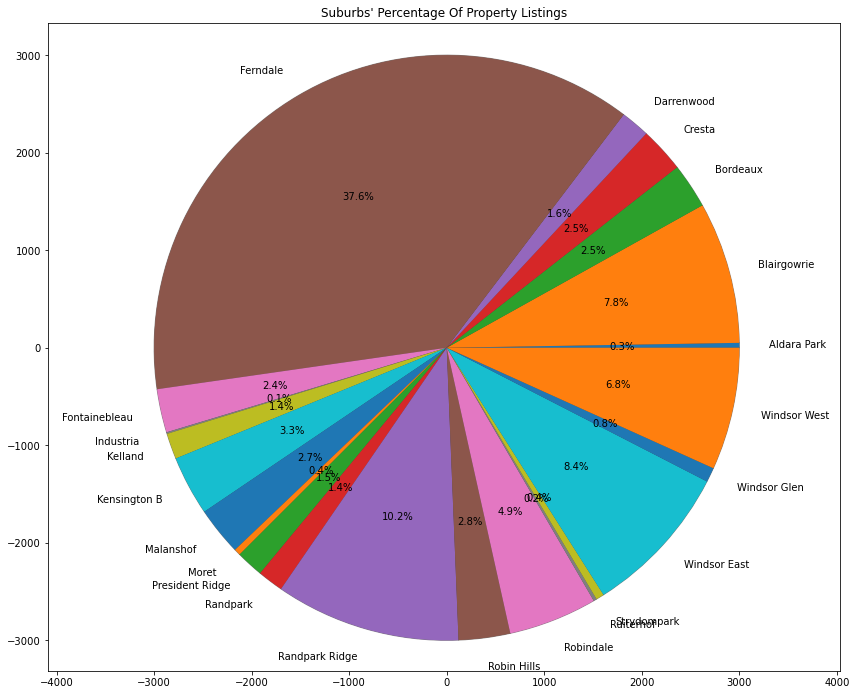

In [290]:
labels = data['Location'].astype('category').cat.categories.tolist()
counts = data['Location'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots(figsize=(10, 9))
fig1.subplots_adjust(-0.1,0,1,1)
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', radius = 3000, frame=True,  shadow=True)
ax1.axis('equal')
plt.title('Suburbs\' Percentage Of Property Listings')
plt.show()

###### Ferndale has the most listed properties for sale on the site. 

In [281]:
### All the Property types in our dataset 
data['Property Type'].unique()

array(['Apartment', 'House', 'Duplex', 'Simplex', 'Townhouse', 'Cluster',
       'Flat', 'Bachelor', 'Land', 'Studio'], dtype=object)

In [282]:
### The number of houses in ferndale
num_house_ferndale = len(data[(data['Location'] =='Ferndale') & (data['Property Type'].str.contains('House', case=False))])
num_house_ferndale

210

In [283]:
# Number of houses in the dataset
num_houses = len(data[(data['Location'] ==data['Location']) & (data['Property Type'].str.contains('House', case=False))])
num_houses

683

In [286]:
# Percentage of ferndale
per_house_ferndale = round((num_house_ferndale / num_houses) * 100, 2)
print('{} % of the houses in our dataset are in ferndale.'.format(per_house_ferndale))

30.75 % of the houses in our dataset are in ferndale.


In [287]:
### Top 5 Property type with the most listings ?
data['Property Type'].value_counts().head()

House        523
Apartment    338
Townhouse    160
Duplex        31
Flat          21
Name: Property Type, dtype: int64

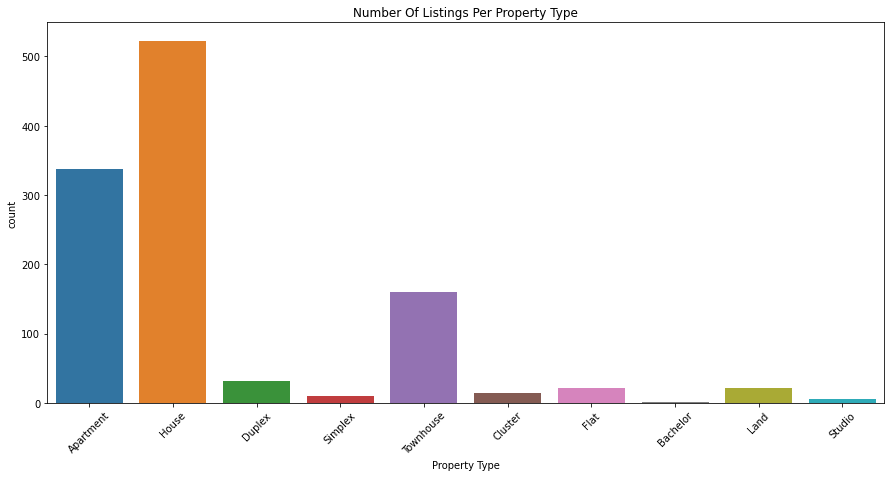

In [288]:
# Visualize number of listings per property type
plt.figure(figsize = (15,7))
ax = sns.countplot(x='Property Type', data=data)
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.title('Number Of Listings Per Property Type')
plt.show()

In [323]:
# properties with the lowest & highest Price tag
print('Lowest Price tag in our dataset is : ', data['Price(R)'].min())
print('Highest Price tag in our dataset is : ', data['Price(R)'].max())

Lowest Price tag in our dataset is :  270000
Highest Price tag in our dataset is :  14950000


In [326]:
# Locate property with the highest & lowest Price tag
print('Location :' , data[data['Price(R)'].max() == data['Price(R)']]['Location'])
print('Location :' , data[data['Price(R)'].min() == data['Price(R)']]['Location'])

Location : 1211    Randpark Ridge
Name: Location, dtype: object
Location : 620    Windsor East
621    Windsor East
Name: Location, dtype: object


In [328]:
# Property type of lowest & highest property type
print('Property Type :',data[data['Price(R)'].max() == data['Price(R)']]['Property Type'])
print('Property Type :',data[data['Price(R)'].min() == data['Price(R)']]['Property Type'])

Property Type : 1211    Land
Name: Property Type, dtype: object
Property Type : 620    Apartment
621    Apartment
Name: Property Type, dtype: object


###### The property with the highest price tag is a piece of land in Randpark Ridge and is priced at R14 950 000. Bizzare.

In [308]:
display(data.loc[1211])

Bedrooms                      3
Bathrooms                     2
Property Type              Land
Location         Randpark Ridge
Price(R)               14950000
Name: 1211, dtype: object

###### The property type appears to be incorrect, how can a vacant land have bedrooms and bathrooms ? 

In [329]:
display(data.loc[620])

Bedrooms                    1
Bathrooms                   1
Property Type       Apartment
Location         Windsor East
Price(R)               270000
Name: 620, dtype: object

###### The property with the lowest price tag has 1 Bedroom, 1 bathroom and is in Windsor East. Makes sense. 